In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

In [4]:
%matplotlib.inline
matplotlib.rcParams['figure.figsize'] = [12.0, 10.0]

ERROR:root:Line magic function `%matplotlib.inline` not found.


In [6]:
train = pd.read_csv('intro_to_ann.csv')
train.head()

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1


In [7]:
train.iloc[:,2]

0      1
1      1
2      0
3      0
4      1
5      0
6      1
7      1
8      0
9      0
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     1
22     1
23     0
24     1
25     1
26     1
27     1
28     1
29     0
      ..
470    0
471    1
472    1
473    0
474    0
475    1
476    0
477    0
478    1
479    1
480    0
481    0
482    1
483    1
484    1
485    0
486    1
487    1
488    0
489    1
490    1
491    1
492    1
493    1
494    0
495    0
496    1
497    1
498    0
499    1
Name: Target, Length: 500, dtype: int64

In [8]:
train.iloc[:,0:2]

,Feature1,Feature2
0,2.067788,0.258133
1,0.993994,-0.609145
2,-0.690315,0.749921
3,1.023582,0.529003
4,0.700747,-0.496724
5,0.955063,0.371061
6,-0.051023,0.009787
7,2.111669,0.291467
8,1.173019,-0.101473
9,-0.577947,1.277303


#### Here, everything of the data is the training data...coz, we will test ONLY if it is 0 or 1...
#### so, we have used all the data as the training dataset


In [10]:

X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

In [11]:
X.shape, y.shape

((500, 2), (500,))

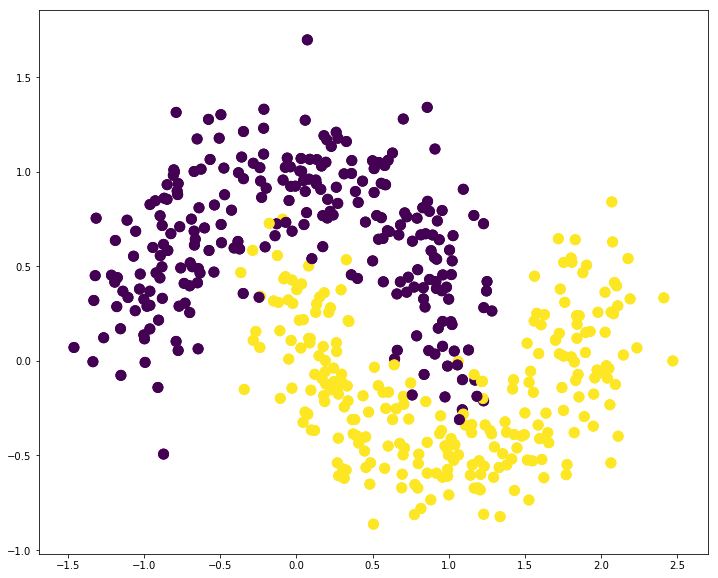

In [13]:
plt.scatter(X[:,0], X[:,1], s=100, c=y)
plt.show()

In [14]:
#function to generate a random number between 2 given numbers
def rand(a,b):
    return (b-a) * random.random() + a

In [23]:
#make a matrix
def makeMatrix(a,b, fill=0.0): #a,b are the dimensions of the matrix
    return np.zeros([a,b])

### Now, we have to create a sigmoid function:

In [16]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

### For backpropagation, we have to do sth like anti-sigmoid...this means like doing a derivative...then we can edit and change the weights, i.e tune the weights...

### by derivating the sigmoid function, we get: derivative(sigmoid) = sigmoid(1 - sigmoid)

In [18]:
#derivative of sigmoid
def dsigmoid(y):
    return y * (1 - y)

### Now, we have to create the cls of the main Neural Network:

In [36]:
class NN:
    
    def __init__(self, no_input, no_hidden, no_output):           #constructor func to construct the whole structure
        #number of inputs, hidden_layers, output nodes
        self.no_input = no_input + 1
        self.no_hidden = no_hidden
        self.no_output = no_output
        
        #activation for nodes
        self.act_input = [1.0] * self.no_input
        self.act_hidden = [1.0] * self.no_hidden
        self.act_output = [1.0] * self.no_output
        
        #creating the weight of the edges thru the layers
        #there will be 2 such weighted edges group: one in-betwen input & hidden layer, other betwn hidden layer & output
        self.weight_input = makeMatrix(self.no_input, self.no_hidden)
        self.weight_output = makeMatrix(self.no_hidden, no_output)
        
        #now just we are putting the weight matrices....just filling the weights with random numbers...both the matrices
        for i in range(self.no_input):
            for j in range(self.no_hidden):
                self.weight_input[i][j] = rand(-0.2, 0.2)
        for i in range(self.no_hidden):
            for j in range(self.no_output):
                self.weight_output[i][j] = rand(-2.0, 2.0)
                
        #we create a new matrix, for we will change the previous thing...
        #the thing by which the weight is to be changed, is stored in this matrix
        self.change_input = makeMatrix(self.no_input, self.no_hidden)
        self.change_output = makeMatrix(self.no_hidden, self.no_output)
        
    
    
    
    def activate(self, inputs):       #here the inputs is the input matrix, containging all the nodes
        #input layer activations
        for i in range(self.no_input - 1):    #here 1 is subtracted for the bias, which is 1
            self.act_input[i] = inputs[i]
            
        #hidden layer activations
        for j in range(self.no_hidden):
            input_sum = 0.0
            for i in range(self.no_input):
                input_sum = input_sum + self.act_input[i] * self.weight_input[i][j]
            self.act_hidden[j] = sigmoid(input_sum)
            
        #output layer activations
        for j in range(self.no_output):
            output_sum = 0.0
            for k in range(self.no_hidden - 1):
                output_sum = output_sum + self.act_hidden[k] * self.weight_output[j][k]
            self.act_output[j] = sigmoid(output_sum)
    
    
    
    
    def backprop(self, targets, N, M):            #here we are doing the backpropagation, just in the reverse order
                                                  #param targets: target 1D array, jeta pawar kotha chilo
        #calculate error for output layer
        output_deltas = np.zeros(self.no_output)
        for k in range(self.no_output):
            error = targets[k] - self.act_output[k]
            output_deltas[k] = dsigmoid(self.act_output[k]) * error
            
        
        #calculate error for hidden layer
        hidden_deltas = np.zeros(self.no_hidden)
        for j in range(self.no_hidden):
            error_hidden = 0.0
            for k in range(self.no_output):
                error_hidden = error_hidden + output_deltas[k] * self.weight_output[j][k]
            hidden_deltas[j] = dsigmoid(self.act_hidden[j]) * error_hidden
            
            
        #now we need to update the weights, using changining matrix, for both output and input
        for j in range(self.no_hidden):                     #update output weights
            for k in range(self.no_output):
                change = output_deltas[k] * self.act_hidden[j]
                self.weight_output[j][k] = self.weight_output[j][k] + N * change + M * self.change_output[j][k]
                self.change_output[j][k] = change
        for i in range(self.no_input):                     #update input weights
            for j in range(self.no_hidden):
                change = hidden_deltas[j] * self.act_input[i]
                self.weight_input[i][j] = self.weight_input[i][j] + N * change + M * self.change_input[i][j]
                self.change_input[i][j] = change
                
        #calculating FINAL loss...using the euclidean error: (0.5)*(y - y_hat)^2
        loss = 0.0
        for k in range(len(targets)):
            loss = loss + 0.5 * (targets[k] - self.act_output[k]) ** 2
        return loss
            
        #we DONOT need to backpropapgate for the input layer

        
        
    
    def test(self, patterns):                               #param patterns: passing the zip of X1 and X2
        self.predict = np.empty([len(patterns), self.no_output])
        for i,p in enumerate(patterns):                     #here, p is the entire input , NOT only 1-feature column
            self.predict[i] = self.activate(p)  
        return
    
    
    
    def train(self, patterns, iterations = 1000, N = 0.5, M = 0.1):
        patterns = list(patterns) #converting the pattersn into a list, containing boh features and targets
        final_loss = 0.0
        for i in range(iterations):
            loss = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                loss = loss + self.backprop([targets], N, M)
            if i % 20 == 0:
                print("error in iteration %d : %.5f" %(i, loss))
            final_loss = loss
        print("Final error {}".format(loss))
        
        return

### now we initialize and then work with the class

In [37]:
n = NN(2, 1, 1)

In [38]:
n.train(zip(X,y), iterations = 100, N = 0.001)

error in iteration 0 : 62.50000
error in iteration 20 : 62.50000
error in iteration 40 : 62.50000
error in iteration 60 : 62.50000
error in iteration 80 : 62.50000
Final error 62.5


In [40]:
n.train(zip(X,y), iterations = 100, N = 1)

error in iteration 0 : 62.50000
error in iteration 20 : 62.50000
error in iteration 40 : 62.50000


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


error in iteration 60 : 62.50000
error in iteration 80 : 62.50000
Final error 62.5
